In [1]:
import sys
sys.path.append("../../..")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import utility

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import utility

In [4]:
df = pd.read_excel("../../../data/yeast_metadata.xlsx", sheet_name="unfiltered_gain")

In [5]:
# rearrange cols in df 
df = df[['Position', 'CHROM', 'REF', 'ALT', 'population_name', 'G70_ref_counts', 'accumulate_gain','G1410_ref_counts', 'G2640_ref_counts', 'G5150_ref_counts',
       'G7530_ref_counts', 'G10150_ref_counts', 'G70_alt_counts',
       'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts',
       'G7530_alt_counts', 'G10150_alt_counts']]

In [6]:
data_all_copy = df.copy()
all_mutation = pd.DataFrame() # The all_mutation dataframe contain generation and population wise accumulated gain

for i in data_all_copy.columns[-6:]:
    new_df_tmp = pd.DataFrame()
    new_df = data_all_copy[data_all_copy.loc[:, i]!=0]
    new_df_tmp = new_df[["population_name", 'CHROM', 'Position', 'REF','ALT']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulate_gain"]
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
    
all_mutation.reset_index(inplace=True, drop=True)
# all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)
# for i in range(all_mutation.shape[0]):
    
#     if all_mutation.loc[i, "label"] in mutator_list:
#         all_mutation.loc[i, "mutator"] = "mutator"
#     if all_mutation.loc[i, "label"] in non_mutator_list:
#         all_mutation.loc[i, "mutator"] = "non mutator"

all_mutation.head()

,population_name,CHROM,Position,REF,ALT,generation,AG,allele count
0,P1C11,chrX,66,C,T,G70_alt_counts,6.067923,7
1,P1C11,chrX,69,T,A,G70_alt_counts,-4.705100,7
2,P1C11,chrX,73,C,T,G70_alt_counts,3.963808,7
3,P2B04,chrX,73,C,T,G70_alt_counts,3.963808,5
4,P1B02,chrX,74,T,C,G70_alt_counts,-2.479826,5


In [8]:
# ann.shape

In [9]:
ann = pd.read_csv("../../../data/yeast_gene_annotations.tsv",
                  sep="\t", on_bad_lines='skip')
ann.head()

,Gene_ORF,Gene,ORF,SGDID,Essential_by_yeastmine,Essential_by_Liu2015,Essential_by_Giaever2002,featureType,briefDescription,description,functionSummary,phenotypeSummary,chromosome,start,end,orf_strand,go_ids,go_terms,go_types
0,GAS5,GAS5,YOL030W,S000005390,False,False,False,ORF,"1,3-beta-glucanosyltransferase","1,3-beta-glucanosyltransferase; has similarity...",NaN,NaN,chrXV,268187,269641,1,GO:0005576;GO:0005618;GO:0005783;GO:0006074;GO...,extracellular region;cell wall;endoplasmic ret...,cellular_component;cellular_component;cellular...
1,GAS4,GAS4,YOL132W,S000005492,False,False,False,ORF,"1,3-beta-glucanosyltransferase","1,3-beta-glucanosyltransferase; involved with ...",NaN,NaN,chrXV,71300,72715,1,GO:0000324;GO:0005618;GO:0005886;GO:0009277;GO...,fungal-type vacuole;cell wall;plasma membrane;...,cellular_component;cellular_component;cellular...
2,GAS2,GAS2,YLR343W,S000004335,False,False,False,ORF,"1,3-beta-glucanosyltransferase","1,3-beta-glucanosyltransferase; involved with ...",NaN,NaN,chrXII,816094,817761,1,GO:0000324;GO:0005618;GO:0005737;GO:0005886;GO...,fungal-type vacuole;cell wall;cytoplasm;plasma...,cellular_component;cellular_component;cellular...
3,SLC1,SLC1,YDL052C,S000002210,False,False,False,ORF,1-acyl-sn-glycerol-3-phosphate acyltransferase,1-acyl-sn-glycerol-3-phosphate acyltransferase...,NaN,NaN,chrIV,362672,363583,-1,GO:0003841;GO:0005783;GO:0005811;GO:0006629;GO...,1-acylglycerol-3-phosphate O-acyltransferase a...,molecular_function;cellular_component;cellular...
4,FAB1,FAB1,YFR019W,S000001915,False,False,False,ORF,1-phosphatidylinositol-3-phosphate 5-kinase,1-phosphatidylinositol-3-phosphate 5-kinase; v...,NaN,Non-essential gene; null mutant has defective ...,chrVI,184502,191338,1,GO:0000166;GO:0000285;GO:0000329;GO:0005524;GO...,nucleotide binding;1-phosphatidylinositol-3-ph...,molecular_function;molecular_function;cellular...


In [10]:
# replace in df Chrom in that chrmt with chrmito
# ann['chromosome'] = ann['chromosome'].replace('chrmt', 'chrmito')

In [11]:
import pandas as pd

# Ensure `CHROM` and `chromosome` are in the same format
ann['chromosome'] = ann['chromosome'].str.lower()
all_mutation['CHROM'] = all_mutation['CHROM'].str.lower()

# Initialize an empty list to store the enriched rows
enriched_data = []

# Loop through each row in df to find a single matching row in ann
for index, row in all_mutation.iterrows():
    # Filter ann to find matching chromosome and position range
    match = ann[
        (ann['chromosome'] == row['CHROM']) & 
        (ann['start'] <= row['Position']) & 
        (ann['end'] >= row['Position'])
    ].iloc[:1]  # Select only the first match (if any)

    # print(match)
    
    # If a match is found, merge data
    if not match.empty:
        match_data = match.iloc[0].to_dict()  # Get the first matching row
        enriched_row = row.to_dict()  # Get the original row data
        enriched_row.update(match_data)  # Add annotation data
    else:
        enriched_row = row.to_dict()  # Get the original row data
        # Add placeholders for annotation columns if no match
        for col in ann.columns:
            if col not in enriched_row:
                enriched_row[col] = None
    
    # Append the enriched row
    enriched_data.append(enriched_row)

# Create the enriched DataFrame
df_enriched = pd.DataFrame(enriched_data)

# Ensure the row count is the same as the original DataFrame
# assert len(df_enriched) == len(df), "Row count mismatch after enrichment!"

# Display the enriched DataFrame
print(df_enriched.head())

  population_name CHROM  Position REF ALT      generation        AG  \
0           P1C11  chrx        66   C   T  G70_alt_counts  6.067923   
1           P1C11  chrx        69   T   A  G70_alt_counts -4.705100   
2           P1C11  chrx        73   C   T  G70_alt_counts  3.963808   
3           P2B04  chrx        73   C   T  G70_alt_counts  3.963808   
4           P1B02  chrx        74   T   C  G70_alt_counts -2.479826   

   allele count Gene_ORF  Gene  ... description functionSummary  \
0             7     None  None  ...        None            None   
1             7     None  None  ...        None            None   
2             7     None  None  ...        None            None   
3             5     None  None  ...        None            None   
4             5     None  None  ...        None            None   

  phenotypeSummary chromosome start end orf_strand go_ids go_terms go_types  
0             None       None   NaN NaN        NaN   None     None     None  
1             

In [27]:
# df_enriched.dropna()["Essential_by_Liu2015"][7597]

x: G70_alt_counts, p-value: 2.28e-10, Cohen's d: 1.42e+00
x: G1410_alt_counts, p-value: 1.84e-18, Cohen's d: 8.72e-01
x: G2640_alt_counts, p-value: 8.22e-07, Cohen's d: 3.38e-01
x: G5150_alt_counts, p-value: 1.21e-13, Cohen's d: 5.20e-01
x: G7530_alt_counts, p-value: 2.25e-06, Cohen's d: 2.32e-01
x: G10150_alt_counts, p-value: 2.99e-08, Cohen's d: 3.33e-01


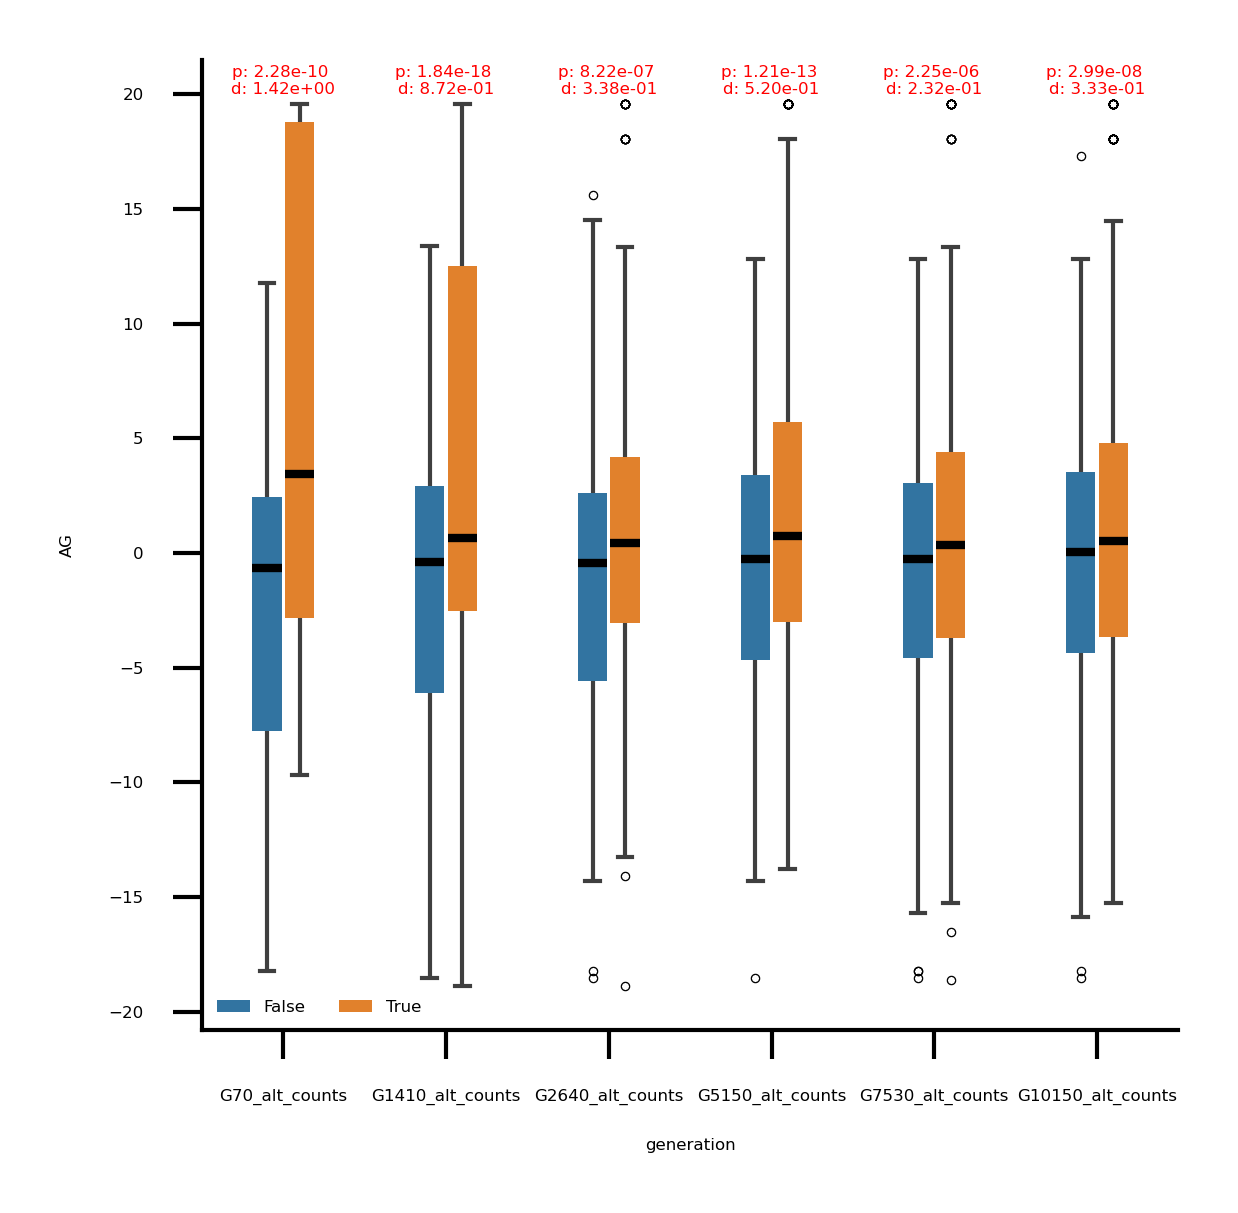

In [26]:
# Plot each score's cumulative sum separately
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(2.1, 2.1), dpi = 600)
ax = sns.boxplot(x='generation', y='AG', data=df_enriched.dropna(), hue='Essential_by_Liu2015', ax =ax, boxprops=dict(edgecolor="black", linewidth=0),flierprops=dict(marker='o', markeredgecolor='black'), width=0.4,linewidth=0.5, fliersize=0.15, dodge=True, medianprops={"color": "black","linewidth":1}, gap = 0.1)
ax = utility.custom_figure_axis(ax=ax, fontsize=2, show_ticks = True, rotation=0)
ax = utility.return_box_with_p_effect_size(ax, data = df_enriched.dropna(), x_columns = 'generation', y_columns = 'AG', group1_name = True, group2_name = False, y_pos = 20, hue_columns="Essential_by_Liu2015", fontsize=2)

ax.legend(ncol = 2, frameon = False, fontsize=2)